In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

/anaconda3/envs/dlcv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
IMG_HELP_PATH = '/Users/shankar/dev/code/ds/studies/data_science/dlcv/sb/c07-first_image_classifier'
import os
import sys
sys.path.append(os.path.abspath(IMG_HELP_PATH))
from pyimagesearch.utils.captchahelper import preprocess
from pyimagesearch.nn.conv import LeNet

In [3]:
DATASET = "dataset"
MODEL = "output/lenet.hdf5"

In [4]:
# Initialize the data and labels
data = []
labels = []

In [5]:
for imagePath in paths.list_images(DATASET):
    # Load the image, preprocess it and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = preprocess(image, 28, 28)
    image = img_to_array(image)
    data.append(image)
    
    # Extract eh class label frok the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    
# Scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)



In [6]:
# Partition the data into training and testing splits using 75% of the data 
# for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# Conver the labels from integers to vectors
lb = LabelBinarizer().fit(trainY)
trainY = lb.transform(trainY)
testY = lb.transform(testY)

In [7]:
trainY[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [8]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=1, classes=10)
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])


[INFO] compiling model...


In [9]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY,  validation_data=(testX, testY),
    batch_size=32, epochs=15, verbose=1)

[INFO] training network...
Train on 1512 samples, validate on 504 samples
Epoch 1/15
1512/1512 [==============================] - 3s 2ms/step - loss: 2.2407 - acc: 0.1779 - val_loss: 2.1951 - val_acc: 0.3294
Epoch 2/15
1512/1512 [==============================] - 2s 2ms/step - loss: 2.1499 - acc: 0.3393 - val_loss: 2.1189 - val_acc: 0.5218
Epoch 3/15
1512/1512 [==============================] - 2s 2ms/step - loss: 2.0650 - acc: 0.4484 - val_loss: 2.0308 - val_acc: 0.1012
Epoch 4/15
1512/1512 [==============================] - 2s 2ms/step - loss: 1.9236 - acc: 0.5648 - val_loss: 1.9296 - val_acc: 0.1012
Epoch 5/15
1512/1512 [==============================] - 2s 2ms/step - loss: 1.6305 - acc: 0.7189 - val_loss: 1.4723 - val_acc: 0.5258
Epoch 6/15
1512/1512 [==============================] - 2s 2ms/step - loss: 1.1087 - acc: 0.8690 - val_loss: 0.9440 - val_acc: 0.7262
Epoch 7/15
1512/1512 [==============================] - 2s 2ms/step - loss: 0.6000 - acc: 0.9590 - val_loss: 0.5409 - val_

In [10]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
                    precision    recall  f1-score   support

.ipynb_checkpoints       1.00      1.00      1.00        51
                 1       1.00      1.00      1.00        75
                 2       0.98      1.00      0.99        55
                 3       1.00      1.00      1.00        47
                 4       1.00      1.00      1.00        57
                 5       1.00      0.99      0.99        69
                 6       1.00      1.00      1.00        53
                 7       1.00      1.00      1.00        55
                 8       1.00      1.00      1.00        42

       avg / total       1.00      1.00      1.00       504



/anaconda3/envs/dlcv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 9, does not match size of target_names, 10
  .format(len(labels), len(target_names))


In [11]:
# save the model to disk
print("[INFO] serializing network...")
model.save(MODEL)

[INFO] serializing network...


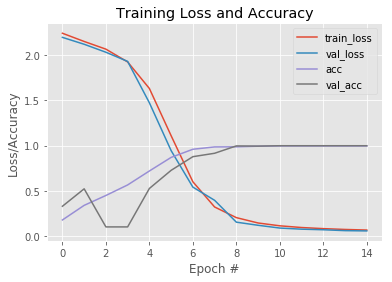

In [12]:
# plot the training + testing loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), H.history["acc"], label="acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()





















